## Fig.S1A-C

/var/folders/gp/l_62hzx91kz0hng_60kps5t00000gn/T/ipykernel_7073/651239010.py:7: DtypeWarning: Columns (232) have mixed types. Specify dtype option on import or set low_memory=False.
  cass_df = pd.read_csv("/Users/tianji/Desktop/Alu Project/Output/Merged_DSE_Results/Cass.AluOverlap.Ctrl.110325.csv")


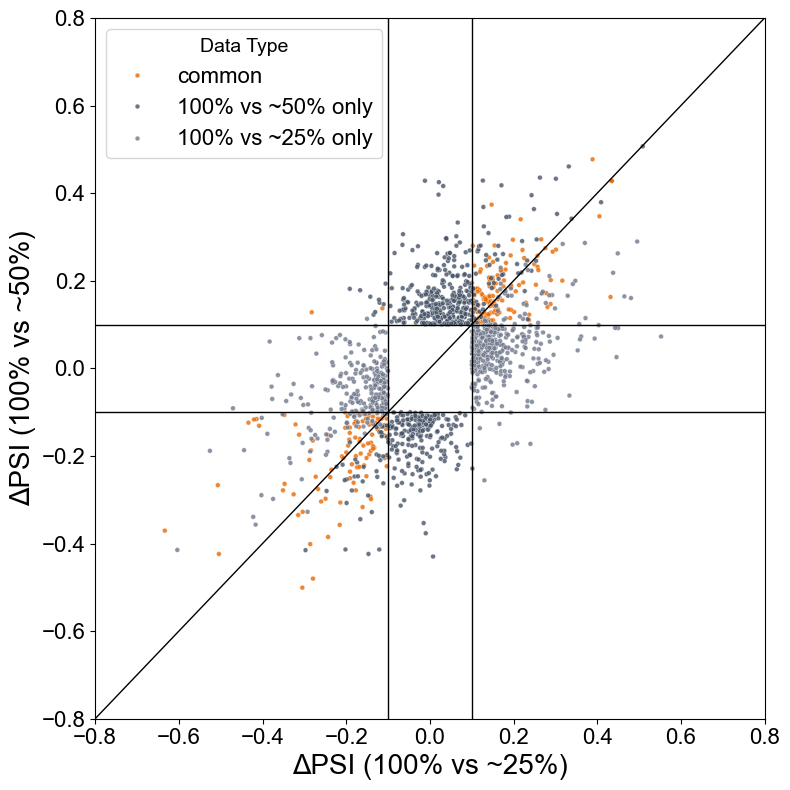

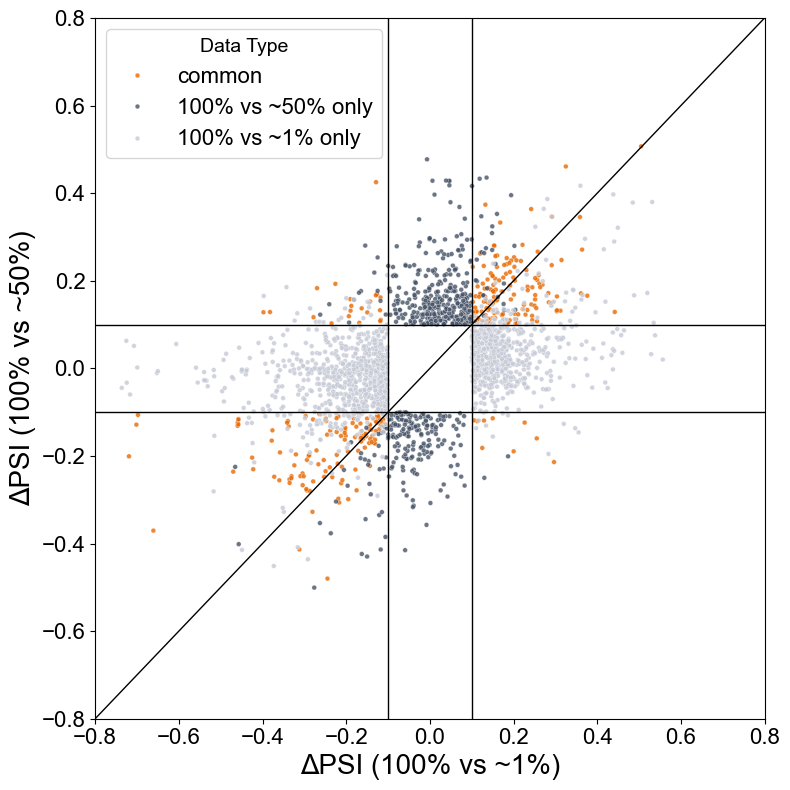

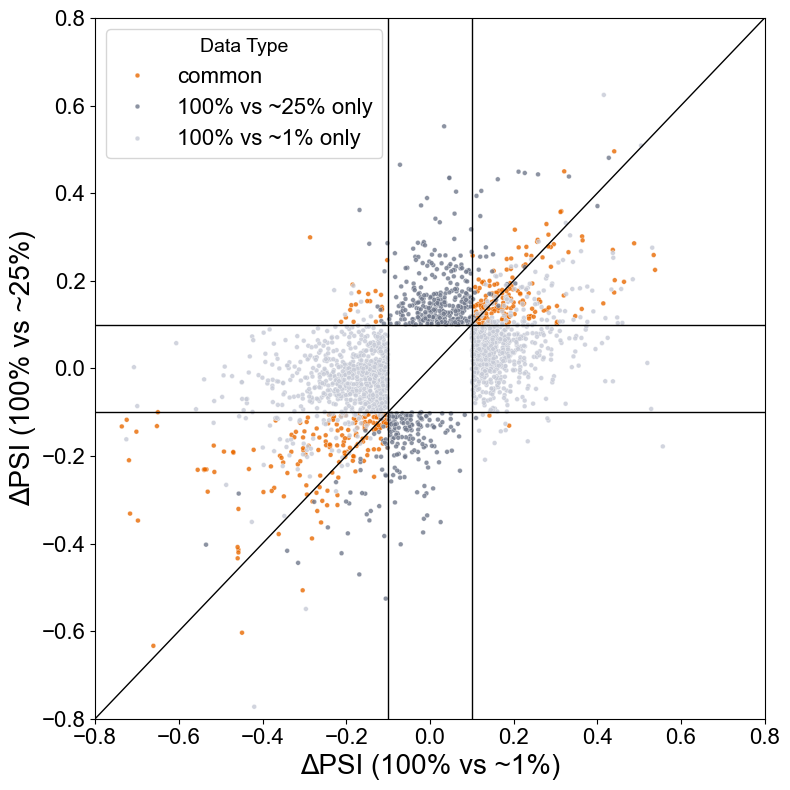

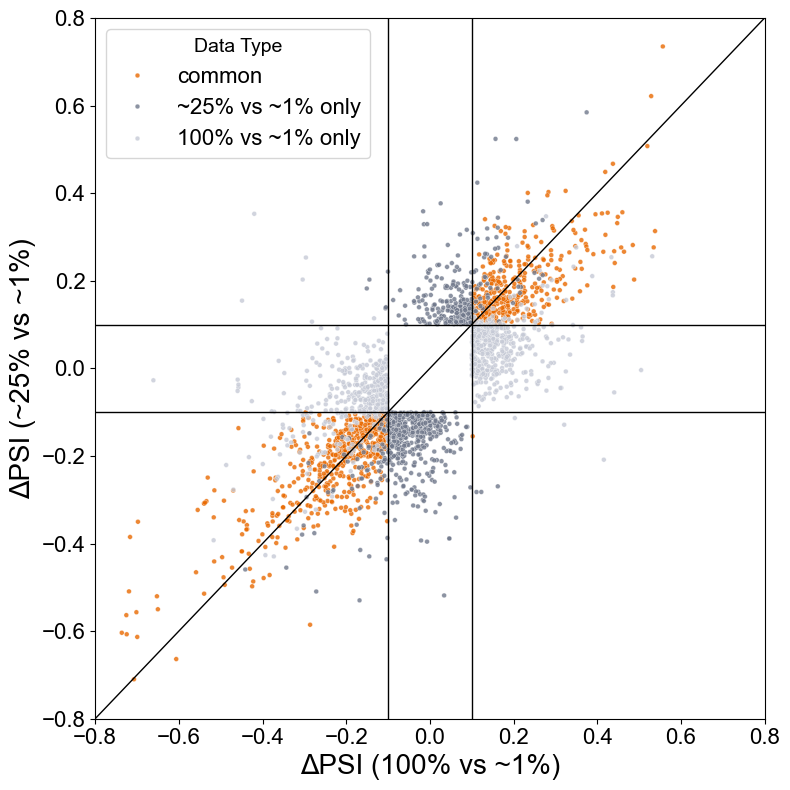

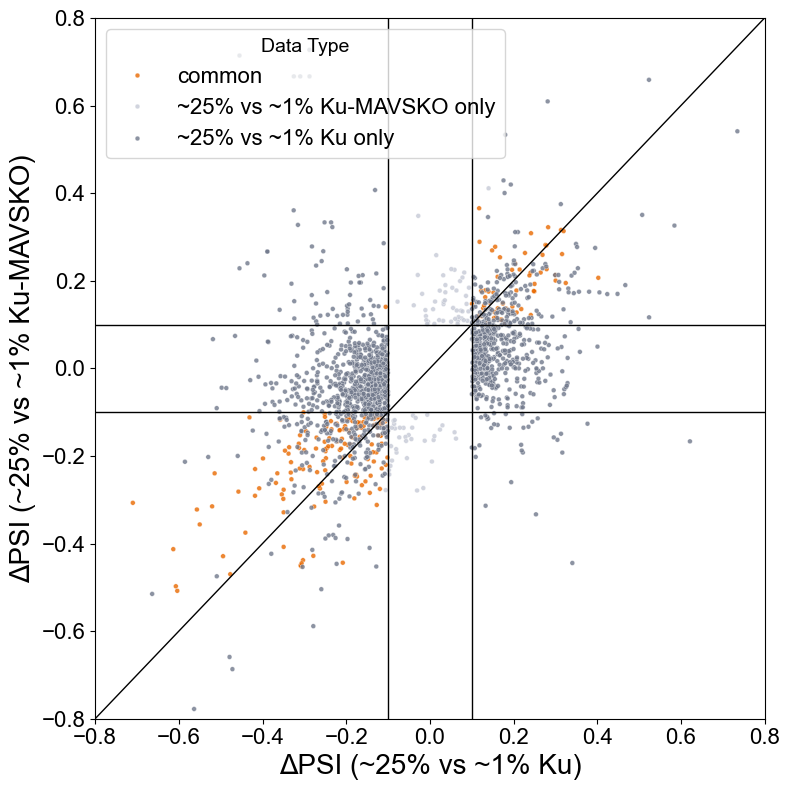

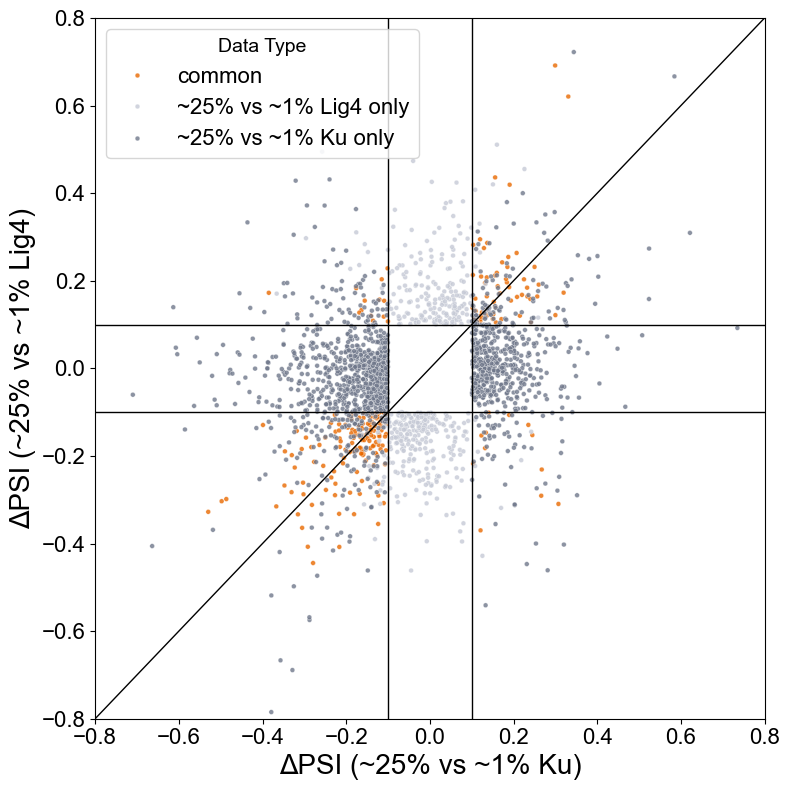

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from HelperFunctions import *
# Read in data sheet
#cass_df = pd.read_csv("/Users/tianji/Desktop/Alu Project/Output/Merged_DSE_Results/Cass.AluOverlap.071825.csv")
cass_df = pd.read_csv("/Users/tianji/Desktop/Alu Project/Output/Merged_DSE_Results/Cass.AluOverlap.Ctrl.110325.csv")
# Define a function that plots scatterplot
def plot_scatter(input_data, x, y, hue, x_label, y_label, output_dir=None, axis_limit=0.8):
    #  Define custom color map
    custom_palette = {
                'common': '#E96900',
                #'100% vs <1% only': '#1A53A1',
                #'10% vs <% only': '#75AFDA',
                #'100% vs 50% only': '#75AFDA',
                #'100% vs 10% only': '#5182BC',
                '100% vs ~1% only': '#C6CAD6', #6B7C99
                '~25% vs ~1% only': '#70788B',
                '100% vs ~50% only': '#465367',
                '100% vs ~25% only': '#70788B',
                '~25% vs ~1% Ku only': '#70788B',
                '~25% vs ~1% Ku-MAVSKO only': '#C6CAD6',
                '~25% vs ~1% Lig4 only': '#C6CAD6',
            }

    plt.figure(figsize=(8, 8))
    sns.scatterplot(
        data=input_data,
        x=x,
        y=y,
        hue=hue,
        palette=custom_palette,
        edgecolor='w',
        alpha=0.8,
        s = 12
    )

    #plt.axhline(0, color='gray', linestyle='--', linewidth=1)
    plt.axhline(0.1, color='black', linestyle='-', linewidth=1)
    plt.axhline(-0.1, color='black', linestyle='-', linewidth=1)
    #plt.axvline(0, color='gray', linestyle='--', linewidth=1)
    plt.axvline(0.1, color='black', linestyle='-', linewidth=1)
    plt.axvline(-0.1, color='black', linestyle='-', linewidth=1)
    plt.plot([-axis_limit, axis_limit], [-axis_limit, axis_limit], color='black', linestyle='-', linewidth=1)


    plt.xlabel(x_label, fontsize=20, family='Arial')
    plt.ylabel(y_label, fontsize=20, family='Arial')
    plt.xticks(fontsize=16, family='Arial')
    plt.yticks(fontsize=16, family='Arial')
    plt.xlim(-axis_limit, axis_limit)
    plt.ylim(-axis_limit, axis_limit)
    plt.legend(title='Data Type', 
               title_fontproperties={'family': 'Arial', 'size': 14},
               prop={'family': 'Arial', 'size': 16},
               loc='upper left')
    plt.tight_layout()
    if output_dir != None:
        plt.savefig(output_dir, format='pdf', bbox_inches='tight', dpi=600)
    plt.show()
    return 0

# Find significantly differentially spliced CEs in different conditions
HCT116_100vs50 = find_significant_samples(cass_df, coverage_col = 'coverage(HCT116.100%Ku_vs_50%Ku)',
                                            FDR_col='FDR(HCT116.100%Ku_vs_50%Ku)',
                                            di_col = 'dI_g1_vs_g2(HCT116.100%Ku_vs_50%Ku)',
                                            FDR_cutoff=0.05, di_cutoff=0.1)
HCT116_100vs10 = find_significant_samples(cass_df, coverage_col = 'coverage(HCT116.100%Ku_vs_10%Ku)',
                                            FDR_col='FDR(HCT116.100%Ku_vs_10%Ku)',
                                            di_col = 'dI_g1_vs_g2(HCT116.100%Ku_vs_10%Ku)',
                                            FDR_cutoff=0.05, di_cutoff=0.1)
HCT116_100vs0 = find_significant_samples(cass_df, coverage_col = 'coverage(HCT116.100%Ku_vs_0%Ku)',
                                            FDR_col='FDR(HCT116.100%Ku_vs_0%Ku)',
                                            di_col = 'dI_g1_vs_g2(HCT116.100%Ku_vs_0%Ku)',
                                            FDR_cutoff=0.05, di_cutoff=0.1)
HCT116_10vs0 = find_significant_samples(cass_df, coverage_col = 'coverage(HCT116.10%Ku_vs_0%Ku)',
                                            FDR_col='FDR(HCT116.10%Ku_vs_0%Ku)',
                                            di_col = 'dI_g1_vs_g2(HCT116.10%Ku_vs_0%Ku)',
                                            FDR_cutoff=0.05, di_cutoff=0.1)
LIG4KD_10vs0 = find_significant_samples(cass_df, coverage_col = 'coverage(Lig4)',  # ← Lig4 columns
                                            FDR_col='FDR(Lig4)',
                                            di_col = 'dI_g1_vs_g2(Lig4)',
                                            FDR_cutoff=0.05, di_cutoff=0.1)
MAVSKO_10vs0 = find_significant_samples(cass_df, coverage_col = 'coverage(MAVSKO)',  # ← MAVSKO columns
                                            FDR_col='FDR(MAVSKO)',
                                            di_col = 'dI_g1_vs_g2(MAVSKO)',
                                            FDR_cutoff=0.05, di_cutoff=0.1)

# plot (100% vs ~50% Ku) VS (100% vs ~25% Ku) PSI values
_, _, _, union_cass_df = overlap_two_conditions(HCT116_100vs50, HCT116_100vs10, anchor = 'name',
                                                overlap_annotation_col = 'overlap',
                                                overlap_annotation_name=['100% vs ~50% only', '100% vs ~25% only', 'common'])
_ = plot_scatter(
    input_data = union_cass_df,
    x = 'dI_g1_vs_g2(HCT116.100%Ku_vs_10%Ku)',
    y = 'dI_g1_vs_g2(HCT116.100%Ku_vs_50%Ku)',
    hue = 'overlap',
    x_label = "ΔPSI (100% vs ~25%)",
    y_label = "ΔPSI (100% vs ~50%)",
    output_dir = "/Users/tianji/Desktop/Alu Project/Paper/Plots/Figure_S1_NotShown.pdf"
)

# plot (100% vs ~25% Ku) VS (100% vs ~1% Ku) PSI values
_, _, _, union_cass_df = overlap_two_conditions(HCT116_100vs50, HCT116_100vs0, anchor = 'name',
                                                overlap_annotation_col = 'overlap',
                                                overlap_annotation_name=['100% vs ~50% only', '100% vs ~1% only', 'common'])
_ = plot_scatter(
    input_data = union_cass_df,
    x = 'dI_g1_vs_g2(HCT116.100%Ku_vs_0%Ku)',
    y = 'dI_g1_vs_g2(HCT116.100%Ku_vs_50%Ku)',
    hue = 'overlap',
    x_label = "ΔPSI (100% vs ~1%)",
    y_label = "ΔPSI (100% vs ~50%)",
    output_dir = "/Users/tianji/Desktop/Alu Project/Paper/Plots/Figure_S1_A.pdf"
)

# plot (100% vs ~1% Ku) VS (100% vs ~25% Ku) PSI values
_, _, _, union_cass_df = overlap_two_conditions(HCT116_100vs10, HCT116_100vs0, anchor = 'name',
                                                overlap_annotation_col = 'overlap',
                                                overlap_annotation_name=['100% vs ~25% only', '100% vs ~1% only', 'common'])
_ = plot_scatter(
    input_data = union_cass_df,
    x = 'dI_g1_vs_g2(HCT116.100%Ku_vs_0%Ku)',
    y = 'dI_g1_vs_g2(HCT116.100%Ku_vs_10%Ku)',
    hue = 'overlap',
    x_label = "ΔPSI (100% vs ~1%)",
    y_label = "ΔPSI (100% vs ~25%)",
    output_dir = "/Users/tianji/Desktop/Alu Project/Paper/Plots/Figure_S1_B.pdf"
)

# plot (100% vs ~1% Ku) VS (~25% vs ~1% Ku) PSI values
_, _, _, union_cass_df = overlap_two_conditions(HCT116_10vs0, HCT116_100vs0, anchor = 'name',
                                                overlap_annotation_col = 'overlap',
                                                overlap_annotation_name=['~25% vs ~1% only', '100% vs ~1% only', 'common'])
_ = plot_scatter(
    input_data = union_cass_df,
    x = 'dI_g1_vs_g2(HCT116.100%Ku_vs_0%Ku)',
    y = 'dI_g1_vs_g2(HCT116.10%Ku_vs_0%Ku)',
    hue = 'overlap',
    x_label = "ΔPSI (100% vs ~1%)",
    y_label = "ΔPSI (~25% vs ~1%)",
    output_dir = "/Users/tianji/Desktop/Alu Project/Paper/Plots/Figure_S1_C.pdf"
)

# MAVSKO plot
_, _, _, union_cass_df = overlap_two_conditions(MAVSKO_10vs0, HCT116_10vs0, anchor = 'name',
                      overlap_annotation_col = 'overlap',
                      overlap_annotation_name=['~25% vs ~1% Ku-MAVSKO only',  
                                              '~25% vs ~1% Ku only',           
                                              'common'])
_ = plot_scatter(
    input_data = union_cass_df,
    x = 'dI_g1_vs_g2(HCT116.10%Ku_vs_0%Ku)',
    y = 'dI_g1_vs_g2(MAVSKO)',  # Now this IS filtered!
    hue = 'overlap',
    x_label = "ΔPSI (~25% vs ~1% Ku)",
    y_label = "ΔPSI (~25% vs ~1% Ku-MAVSKO)",
    output_dir = "/Users/tianji/Desktop/Alu Project/Paper/Plots/Figure_S4_MAVSKO.pdf"
)

# Lig4 plot
_, _, _, union_cass_df = overlap_two_conditions(LIG4KD_10vs0, HCT116_10vs0, anchor = 'name',
                      overlap_annotation_col = 'overlap',
                      overlap_annotation_name=['~25% vs ~1% Lig4 only',  
                                              '~25% vs ~1% Ku only',      
                                              'common'])
_ = plot_scatter(
    input_data = union_cass_df,
    x = 'dI_g1_vs_g2(HCT116.10%Ku_vs_0%Ku)',
    y = 'dI_g1_vs_g2(Lig4)',  # Now this IS filtered!
    hue = 'overlap',
    x_label = "ΔPSI (~25% vs ~1% Ku)",
    y_label = "ΔPSI (~25% vs ~1% Lig4)",
    output_dir = "/Users/tianji/Desktop/Alu Project/Paper/Plots/Figure_S4_Lig4.pdf"
)

In [17]:
def compare_groups(cass_df, include_mavsko_lig4=False):
    # Define column sets with human-readable labels
    groups = {
        "100vs50": {
            "label": "100% vs 50%",
            "di": 'dI_g1_vs_g2(HCT116.100%Ku_vs_50%Ku)',
            "cov": 'coverage(HCT116.100%Ku_vs_50%Ku)',
            "fdr": 'FDR(HCT116.100%Ku_vs_50%Ku)'
        },
        "100vs10": {
            "label": "100% vs 10%",
            "di": 'dI_g1_vs_g2(HCT116.100%Ku_vs_10%Ku)',
            "cov": 'coverage(HCT116.100%Ku_vs_10%Ku)',
            "fdr": 'FDR(HCT116.100%Ku_vs_10%Ku)'
        },
        "100vs0": {
            "label": "100% vs 0%",
            "di": 'dI_g1_vs_g2(HCT116.100%Ku_vs_0%Ku)',
            "cov": 'coverage(HCT116.100%Ku_vs_0%Ku)',
            "fdr": 'FDR(HCT116.100%Ku_vs_0%Ku)'
        },
        "10vs0": {
            "label": "10% vs 0%",
            "di": 'dI_g1_vs_g2(HCT116.10%Ku_vs_0%Ku)',
            "cov": 'coverage(HCT116.10%Ku_vs_0%Ku)',
            "fdr": 'FDR(HCT116.10%Ku_vs_0%Ku)'
        },
        "MAVSKO": {
            "label": "10% vs 0% MAVSKO",
            "di": 'dI_g1_vs_g2(MAVSKO)',
            "cov": 'coverage(MAVSKO)',
            "fdr": 'FDR(MAVSKO)'
        },
        "Lig4": {
            "label": "10% vs 0% Lig4",
            "di": 'dI_g1_vs_g2(Lig4)',
            "cov": 'coverage(Lig4)',
            "fdr": 'FDR(Lig4)'
        }
    }
    
    # Define comparisons (group1, group2)
    comparisons = [
        ("100vs50", "100vs0"),
        ("100vs10", "100vs0"),
        ("10vs0",   "100vs0")
    ]
    
    # Add MAVSKO and Lig4 comparisons if requested
    if include_mavsko_lig4:
        comparisons.extend([
            ("10vs0", "MAVSKO"),
            ("10vs0", "Lig4")
        ])
    
    results = {}
    
    for g1, g2 in comparisons:
        label1, label2 = groups[g1]["label"], groups[g2]["label"]
        di1, cov1, fdr1 = groups[g1]["di"], groups[g1]["cov"], groups[g1]["fdr"]
        di2, cov2, fdr2 = groups[g2]["di"], groups[g2]["cov"], groups[g2]["fdr"]
        
        # Filter: samples significant in group1 OR group2
        sig1 = (cass_df[cov1] > 20) & (cass_df[fdr1] < 0.05) & (cass_df[di1].abs() > 0.1)
        sig2 = (cass_df[cov2] > 20) & (cass_df[fdr2] < 0.05) & (cass_df[di2].abs() > 0.1)
        sig_any = sig1 | sig2
        
        subset = cass_df[sig_any]
        print(f"=== Comparing {label1} vs {label2} ===")
        print(f"Number of {label1}: {sig1.sum()}")
        print(f"Number of {label2}: {sig2.sum()}")
        print(f"Total samples detectable samples in {label1} and {label2} is {len(subset)}")
        
        # Four categories
        cond1 = (subset[di2].abs() < 0.1) & (subset[di1] > 0.1)
        cond2 = (subset[di2].abs() < 0.1) & (subset[di1] < -0.1)
        cond3 = (subset[di1].abs() < 0.1) & (subset[di2] > 0.1)
        cond4 = (subset[di1].abs() < 0.1) & (subset[di2] < -0.1)
        cond5 = (subset[di1] > 0.1) & (subset[di2] > 0.1)
        cond6 = (subset[di1] < -0.1) & (subset[di2] < -0.1)
        
        print(f"{label2} |dI| < 0.1 & {label1} dI > 0.1: {cond1.sum()} ({100*cond1.sum()/len(subset):.2f}%)")
        print(f"{label2} |dI| < 0.1 & {label1} dI < -0.1: {cond2.sum()} ({100*cond2.sum()/len(subset):.2f}%)")
        print(f"{label1} |dI| < 0.1 & {label2} dI > 0.1: {cond3.sum()} ({100*cond3.sum()/len(subset):.2f}%)")
        print(f"{label1} |dI| < 0.1 & {label2} dI < -0.1: {cond4.sum()} ({100*cond4.sum()/len(subset):.2f}%)")
        print(f"{label1} dI > 0.1 & {label2} dI > 0.1: {cond5.sum()} ({100*cond5.sum()/len(subset):.2f}%)")
        print(f"{label1} dI < -0.1 & {label2} dI < -0.1: {cond6.sum()} ({100*cond6.sum()/len(subset):.2f}%)")
        print("\n")
    
    return 0

# Run without MAVSKO and Lig4
compare_groups(cass_df)

# Run with MAVSKO and Lig4
compare_groups(cass_df, include_mavsko_lig4=True)

=== Comparing 100% vs 50% vs 100% vs 0% ===
Number of 100% vs 50%: 891
Number of 100% vs 0%: 1833
Total samples detectable samples in 100% vs 50% and 100% vs 0% is 2426
100% vs 0% |dI| < 0.1 & 100% vs 50% dI > 0.1: 342 (14.10%)
100% vs 0% |dI| < 0.1 & 100% vs 50% dI < -0.1: 175 (7.21%)
100% vs 50% |dI| < 0.1 & 100% vs 0% dI > 0.1: 598 (24.65%)
100% vs 50% |dI| < 0.1 & 100% vs 0% dI < -0.1: 745 (30.71%)
100% vs 50% dI > 0.1 & 100% vs 0% dI > 0.1: 252 (10.39%)
100% vs 50% dI < -0.1 & 100% vs 0% dI < -0.1: 239 (9.85%)


=== Comparing 100% vs 10% vs 100% vs 0% ===
Number of 100% vs 10%: 902
Number of 100% vs 0%: 1833
Total samples detectable samples in 100% vs 10% and 100% vs 0% is 2363
100% vs 0% |dI| < 0.1 & 100% vs 10% dI > 0.1: 307 (12.99%)
100% vs 0% |dI| < 0.1 & 100% vs 10% dI < -0.1: 146 (6.18%)
100% vs 10% |dI| < 0.1 & 100% vs 0% dI > 0.1: 556 (23.53%)
100% vs 10% |dI| < 0.1 & 100% vs 0% dI < -0.1: 708 (29.96%)
100% vs 10% dI > 0.1 & 100% vs 0% dI > 0.1: 301 (12.74%)
100% vs 10% dI

0

## Fugure 1C

/Users/tianji/mambaforge/envs/myenv/lib/python3.12/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/var/folders/gp/l_62hzx91kz0hng_60kps5t00000gn/T/ipykernel_28041/2561487186.py:6: DtypeWarning: Columns (195) have mixed types. Specify dtype option on import or set low_memory=False.
  cass_df = pd.read_csv("/Users/tianji/Desktop/Alu Project/100vs0&10vs0 Output/Cass.Merged.Results.csv")


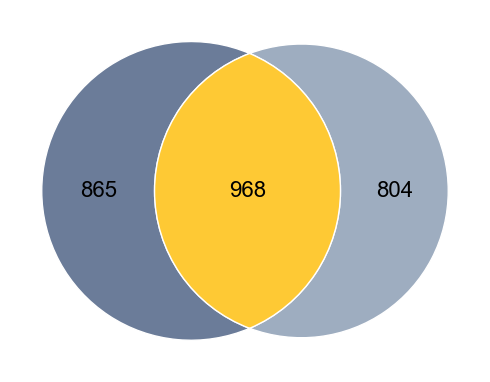

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
""" Union Old Cycling & G1 Arrest vs New Genewiz"""
# Read in data sheet
cass_df = pd.read_csv("/Users/tianji/Desktop/Alu Project/100vs0&10vs0 Output/Cass.Merged.Results.csv")

# --- Build sets -------------------------------------------------------------
mask_100_vs_0 = (
    cass_df['filter(HCT116.100%Ku_vs_0%Ku)'].isin([1, -1])
)
mask_10_vs_0 = (
    cass_df['filter(HCT116.10%Ku_vs_0%Ku)'].isin([1, -1])
)

set_100_vs_0 = set(cass_df.loc[mask_100_vs_0, 'name'].dropna().astype(str).unique())
set_10_vs_0 = set(cass_df.loc[mask_10_vs_0, 'name'].dropna().astype(str).unique())

# --- Plot Venn --------------------------------------------------------------
fig, ax = plt.subplots(figsize=(5, 5))

# set_labels = ('100 vs 0', '(10 vs 0)')
# replace with ('','') to hide them
v = venn2(
    subsets=(set_100_vs_0, set_10_vs_0),
    set_labels=('', ''),  # hide set labels
    ax=ax
)

# Set circle colors
if v.get_patch_by_id('10'):
    v.get_patch_by_id('10').set_facecolor('#6B7C99')
    v.get_patch_by_id('10').set_edgecolor('white')
    v.get_patch_by_id('10').set_alpha(1.0)

if v.get_patch_by_id('01'):
    v.get_patch_by_id('01').set_facecolor('#9EADC0')
    v.get_patch_by_id('01').set_edgecolor('white')
    v.get_patch_by_id('01').set_alpha(1.0)

if v.get_patch_by_id('11'):
    v.get_patch_by_id('11').set_facecolor('#FEC934')
    v.get_patch_by_id('11').set_edgecolor('white')
    v.get_patch_by_id('11').set_alpha(1.0)

# Adjust font for the numbers
for lbl in ['10', '01', '11']:
    if v.get_label_by_id(lbl):
        v.get_label_by_id(lbl).set_fontsize(16)
        v.get_label_by_id(lbl).set_family('Arial')

plt.tight_layout()

# Save to PDF
plt.savefig(
    "/Users/tianji/Desktop/Alu Project/Paper/Plots/Fig.1C Venn Diagram.pdf",
    format="pdf",
    bbox_inches="tight",
    dpi=300
)
plt.show()
plt.close()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# --- Read in data ---
cass_df = pd.read_csv("/Users/tianji/Desktop/Alu Project/100vs0&10vs0 Output/Cass.Merged.Results.csv")

def make_venn(direction, outfile):
    """
    direction: 1 for up-regulated, -1 for down-regulated
    outfile: path to save pdf
    """

    # Masks for significant samples in given direction
    mask_100_vs_0 = cass_df['filter(HCT116.100%Ku_vs_0%Ku)'] == direction
    mask_10_vs_0  = cass_df['filter(HCT116.10%Ku_vs_0%Ku)'] == direction

    set_100_vs_0 = set(cass_df.loc[mask_100_vs_0, 'name'].dropna().astype(str).unique())
    set_10_vs_0  = set(cass_df.loc[mask_10_vs_0, 'name'].dropna().astype(str).unique())

    # --- Plot Venn ---
    fig, ax = plt.subplots(figsize=(5, 5))
    v = venn2(
        subsets=(set_100_vs_0, set_10_vs_0),
        set_labels=('', ''),  # no labels
        ax=ax
    )

    # Circle colors
    if v.get_patch_by_id('10'):
        v.get_patch_by_id('10').set_facecolor('#6B7C99')
        v.get_patch_by_id('10').set_edgecolor('white')
        v.get_patch_by_id('10').set_alpha(1.0)

    if v.get_patch_by_id('01'):
        v.get_patch_by_id('01').set_facecolor('#9EADC0')
        v.get_patch_by_id('01').set_edgecolor('white')
        v.get_patch_by_id('01').set_alpha(1.0)

    if v.get_patch_by_id('11'):
        v.get_patch_by_id('11').set_facecolor('#FEC934')  # intersection color changed
        v.get_patch_by_id('11').set_edgecolor('white')
        v.get_patch_by_id('11').set_alpha(1.0)

    # Adjust font for numbers
    for lbl in ['10', '01', '11']:
        if v.get_label_by_id(lbl):
            v.get_label_by_id(lbl).set_fontsize(30)
            v.get_label_by_id(lbl).set_family('Arial')

    plt.tight_layout()
    plt.savefig(outfile, format="pdf", bbox_inches="tight", dpi=300)
    plt.close()

# --- Generate both diagrams ---
make_venn(1, "/Users/tianji/Desktop/Alu Project/Paper/Plots/Fig.1C Up-Spliced Venn Diagram.pdf")
make_venn(-1, "/Users/tianji/Desktop/Alu Project/Paper/Plots/Fig.1C Down-Spliced Venn Diagram.pdf")


/var/folders/gp/l_62hzx91kz0hng_60kps5t00000gn/T/ipykernel_28041/1096957140.py:6: DtypeWarning: Columns (195) have mixed types. Specify dtype option on import or set low_memory=False.
  cass_df = pd.read_csv("/Users/tianji/Desktop/Alu Project/100vs0&10vs0 Output/Cass.Merged.Results.csv")


## Fig 1C & Fig.S2A

/var/folders/gp/l_62hzx91kz0hng_60kps5t00000gn/T/ipykernel_28041/182579958.py:7: DtypeWarning: Columns (195) have mixed types. Specify dtype option on import or set low_memory=False.
  cass_df = pd.read_csv("/Users/tianji/Desktop/Alu Project/100vs0&10vs0 Output/Cass.Merged.Results.csv")


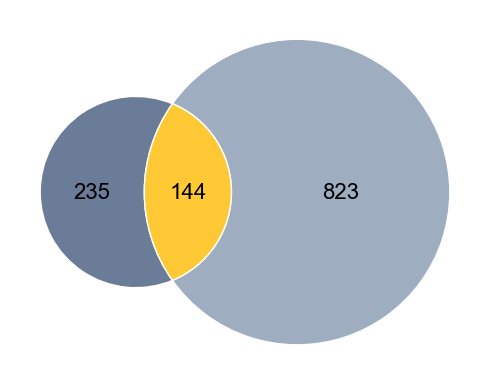

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
""" Union Old Cycling & G1 Arrest vs New Genewiz"""
# Read in data sheet
#cass_df = pd.read_csv("/Users/tianji/Desktop/Alu Project/Output/Merged_DSE_Results/Cass.AluOverlap.071825.csv")
cass_df = pd.read_csv("/Users/tianji/Desktop/Alu Project/100vs0&10vs0 Output/Cass.Merged.Results.csv")

# --- Build sets -------------------------------------------------------------
mask_old = (
    cass_df['filter(Cyc.HCT116.KuKD)'].isin([1, -1]) |
    cass_df['filter(G1Arr.HCT116.KuKD)'].isin([1, -1])
)
mask_new = cass_df['sensitivity'].isin(['high'])

old_set = set(cass_df.loc[mask_old, 'name'].dropna().astype(str).unique())
new_set = set(cass_df.loc[mask_new, 'name'].dropna().astype(str).unique())

# --- Plot Venn --------------------------------------------------------------
fig, ax = plt.subplots(figsize=(5, 5))

# set_labels = ('Old (Cyc|G1Arr)', 'New (sensitivity)')
# replace with ('','') to hide them
v = venn2(
    subsets=(old_set, new_set),
    set_labels=('', ''),  # hide set labels
    ax=ax
)

# Set circle colors
if v.get_patch_by_id('10'):
    v.get_patch_by_id('10').set_facecolor('#6B7C99')
    v.get_patch_by_id('10').set_edgecolor('white')
    v.get_patch_by_id('10').set_alpha(1.0)

if v.get_patch_by_id('01'):
    v.get_patch_by_id('01').set_facecolor('#9EADC0')
    v.get_patch_by_id('01').set_edgecolor('white')
    v.get_patch_by_id('01').set_alpha(1.0)

if v.get_patch_by_id('11'):
    v.get_patch_by_id('11').set_facecolor('#FEC934')
    v.get_patch_by_id('11').set_edgecolor('white')
    v.get_patch_by_id('11').set_alpha(1.0)

# Adjust font for the numbers
for lbl in ['10', '01', '11']:
    if v.get_label_by_id(lbl):
        v.get_label_by_id(lbl).set_fontsize(16)
        v.get_label_by_id(lbl).set_family('Arial')

plt.tight_layout()

# Save to PDF
plt.savefig(
    "/Users/tianji/Desktop/Alu Project/Paper/Plots/Fig.S1A Venn Diagram.pdf",
    format="pdf",
    bbox_inches="tight",
    dpi=300
)
plt.show()
plt.close()

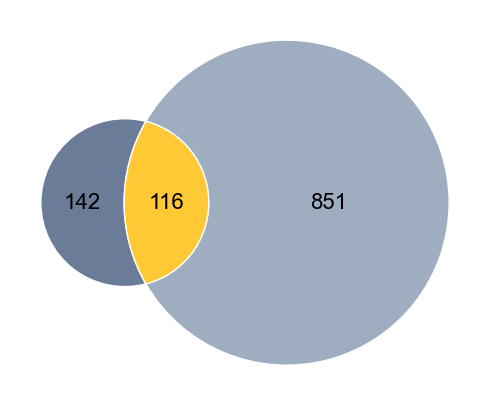

In [4]:
""" Old G1 Arrest vs New Genewiz"""
old_mask = (
    (cass_df['coverage(G1Arr.HCT116.KuKD)'] > 20) &
    (cass_df['FDR(G1Arr.HCT116.KuKD)'] < 0.05) &
    (cass_df['dI_g1_vs_g2(G1Arr.HCT116.KuKD)'].abs() > 0.1)
)
old_set = set(cass_df.loc[old_mask, 'name'].dropna().astype(str).unique())
new_set = set(cass_df.loc[cass_df['sensitivity'].isin(['high']), 'name']
              .dropna().astype(str).unique())

# --- Plot Venn --------------------------------------------------------------
fig, ax = plt.subplots(figsize=(5, 5))

# replace with ('','') to hide them
v = venn2(
    subsets=(old_set, new_set),
    set_labels=('', ''),  # hide set labels
    ax=ax
)

# Set circle colors
if v.get_patch_by_id('10'):
    v.get_patch_by_id('10').set_facecolor('#6B7C99')
    v.get_patch_by_id('10').set_edgecolor('white')
    v.get_patch_by_id('10').set_alpha(1.0)

if v.get_patch_by_id('01'):
    v.get_patch_by_id('01').set_facecolor('#9EADC0')
    v.get_patch_by_id('01').set_edgecolor('white')
    v.get_patch_by_id('01').set_alpha(1.0)

if v.get_patch_by_id('11'):
    v.get_patch_by_id('11').set_facecolor('#FEC934')
    v.get_patch_by_id('11').set_edgecolor('white')
    v.get_patch_by_id('11').set_alpha(1.0)

# Adjust font for the numbers
for lbl in ['10', '01', '11']:
    if v.get_label_by_id(lbl):
        v.get_label_by_id(lbl).set_fontsize(16)
        v.get_label_by_id(lbl).set_family('Arial')

plt.tight_layout()
plt.show()

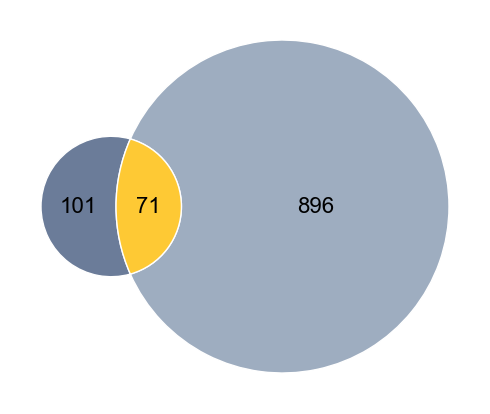

In [5]:
""" Old Cycling vs New Genewiz"""

old_mask = (
    (cass_df['coverage(Cyc.HCT116.KuKD)'] > 20) &
    (cass_df['FDR(Cyc.HCT116.KuKD)'] < 0.05) &
    (cass_df['dI_g1_vs_g2(Cyc.HCT116.KuKD)'].abs() > 0.1)
)
old_set = set(cass_df.loc[old_mask, 'name'].dropna().astype(str).unique())
new_set = set(cass_df.loc[cass_df['sensitivity'].isin(['high']), 'name']
              .dropna().astype(str).unique())

# --- Plot Venn --------------------------------------------------------------
fig, ax = plt.subplots(figsize=(5, 5))

# set_labels = ('Old (Cyc|G1Arr)', 'New (sensitivity)')
# replace with ('','') to hide them
v = venn2(
    subsets=(old_set, new_set),
    set_labels=('', ''),  # hide set labels
    ax=ax
)

# Set circle colors
if v.get_patch_by_id('10'):
    v.get_patch_by_id('10').set_facecolor('#6B7C99')
    v.get_patch_by_id('10').set_edgecolor('white')
    v.get_patch_by_id('10').set_alpha(1.0)

if v.get_patch_by_id('01'):
    v.get_patch_by_id('01').set_facecolor('#9EADC0')
    v.get_patch_by_id('01').set_edgecolor('white')
    v.get_patch_by_id('01').set_alpha(1.0)

if v.get_patch_by_id('11'):
    v.get_patch_by_id('11').set_facecolor('#FEC934')
    v.get_patch_by_id('11').set_edgecolor('white')
    v.get_patch_by_id('11').set_alpha(1.0)

# Adjust font for the numbers
for lbl in ['10', '01', '11']:
    if v.get_label_by_id(lbl):
        v.get_label_by_id(lbl).set_fontsize(16)
        v.get_label_by_id(lbl).set_family('Arial')

plt.tight_layout()
plt.show()

# Figure 2B & Fig.S5

### Read Data and Define Function

In [31]:
import pandas as pd
import numpy as np
from typing import List, Hashable
from typing import Optional

#cass_df = pd.read_csv('/Users/tianji/Desktop/Alu Project/Output/Merged_DSE_Results/Cass.AluOverlap.Ctrl.081325.csv')
#cass_df = pd.read_csv('/Users/tianji/Desktop/Alu Project/100vs0&10vs0 Output/Cass.Merged.Results.csv')
cass_df = pd.read_csv("/Users/tianji/Desktop/Alu Project/Output/Merged_DSE_Results/Cass.AluOverlap.Ctrl.110325.csv")

# Create a new alu type column that specifies 'other without Alu' and 'other with Alu'
cass_df['alu_type_for_count'] = cass_df['alu_type']

# Put "other_without_Alu" into its own bucket as requested
cass_df.loc[
    cass_df['alu_subtype'] == 'other_without_Alu',
    'alu_type_for_count'
] = 'other_without_Alu'

cass_df.loc[
    ((cass_df['alu_specific_subtype'] == 'other_with_irAlu_only_ui') | (cass_df['alu_specific_subtype'] == 'other_with_irAlu_only_di')),
    'alu_type_for_count'
] = 'other_irAlu_intra'


# CGC high confident samples 
c1 = 'filter(Cyc.HCT116.KuKD)'
c2 = 'filter(G1Arr.HCT116.KuKD)'
cass_df['filter(CGC)'] = np.nan
# Condition: either col in [-1, 0, 1] (but not the "2" condition) → 0
cond_0 = (cass_df[c1].isin([-1, 0, 1]) | cass_df[c2].isin([-1, 0, 1]))
# Condition: (1) == -1 & (2) == 1 OR (1) == 1 & (2) == -1 → 2
cond_2 = ((cass_df[c1] == -1) & (cass_df[c2] == 1)) | \
         ((cass_df[c1] == 1) & (cass_df[c2] == -1))
# Assign in order of priority
cass_df.loc[cond_0, 'filter(CGC)'] = 0
cass_df.loc[cond_2, 'filter(CGC)'] = 2
# Condition: still 0, but if either col == -1 → -1
cond_neg1 = (cass_df['filter(CGC)'] == 0) & ((cass_df[c1] == -1) | (cass_df[c2] == -1))
# Condition: still 0, but if either col == 1 → 1
cond_pos1 = (cass_df['filter(CGC)'] == 0) & ((cass_df[c1] == 1) | (cass_df[c2] == 1))
cass_df.loc[cond_neg1, 'filter(CGC)'] = -1
cass_df.loc[cond_pos1, 'filter(CGC)'] = 1

import numpy as np

# Column names (use exact strings)
c1 = 'coverage(HCT116.100%Ku_vs_0%Ku)'
c2 = 'coverage(HCT116.10%Ku_vs_0%Ku)'
f0 = 'filter(HCT116.100%Ku_vs_0%Ku)'

# init as NA (use Int64 so NA is allowed for ints)
cass_df['filter(GENEWIZ)'] = pd.Series(np.nan, index=cass_df.index, dtype="float")

# 1) detected if either coverage > 20 -> 0
detected_mask = (cass_df[c1] > 20) | (cass_df[c2] > 20)
cass_df.loc[detected_mask, 'filter(GENEWIZ)'] = 0

# 2) overwrite with activation/repression for high-sensitivity samples
high_mask = cass_df['sensitivity'].eq('high')

cass_df.loc[high_mask & (cass_df[f0] == 1),  'filter(GENEWIZ)'] = 1
cass_df.loc[high_mask & (cass_df[f0] == -1), 'filter(GENEWIZ)'] = -1

# (optional) make it nullable integer: -1,0,1 with <NA> for missing
cass_df['filter(GENEWIZ)'] = cass_df['filter(GENEWIZ)'].astype('Int64')

def summarize_alu_counts(
    df: pd.DataFrame,
    alu_col: str,
    filter_col: str,
    DSE_df: Optional[pd.DataFrame] = None,
    multi_filters: bool = False
) -> pd.DataFrame:
    """
    Build a summary table by alu_type and Ku/DSE filters.

    Parameters
    ----------
    df : pd.DataFrame
        Input DataFrame (must contain columns `alu_col`, `filter_col`, and 'ku_bound').
    alu_col : str
        Column name containing alu categories (e.g., 'alu_type').
    filter_col : str
        Column indicating DSE status with values in {-1, 0, 1} (or similar).
        -1 = repressed, 1 = activated, others treated as non-DSE.
    DSE_df : pd.DataFrame, optional
        If provided/used (multi_filters=True), this should be the dataframe already filtered
        to DSEs (i.e., rows where filter_col ∈ {-1, 1}). For safety we re-filter below.
    multi_filters : bool
        If True, DSE-related rows (Total/Act/Rep DSEs and their Ku-bound variants) are
        counted from DSE_df instead of df.

    Returns
    -------
    pd.DataFrame
        Rows:
          'Total CEs', 'Total DSEs', 'Activated DSEs', 'Repressed DSEs',
          'Ku-Bound Total CEs', 'Ku-bound Total DSEs',
          'Ku-bound Activated DSEs', 'Ku-bound Repressed DSEs'
        Columns: unique categories from `alu_col` (missing categories filled with 0).
    """
    required = {alu_col, filter_col, 'ku_bound'}
    missing = required - set(df.columns)
    if missing:
        raise KeyError(f"Missing required column(s) in df: {', '.join(sorted(missing))}")

    if multi_filters:
        if DSE_df is None:
            raise ValueError("multi_filters=True requires DSE_df.")
        # Validate DSE_df schema
        missing_dse = required - set(DSE_df.columns)
        if missing_dse:
            raise KeyError(f"Missing required column(s) in DSE_df: {', '.join(sorted(missing_dse))}")
        # For safety, re-enforce that DSE_df only contains DSEs
        DSE_df = DSE_df.loc[DSE_df[filter_col].isin([-1, 1])].copy()

    # Column order = categories observed in the full df
    categories: List[Hashable] = list(pd.unique(df[alu_col].dropna()))

    # --- helpers that operate on DATAFRAMES (not masks) ---
    def count_in(frame: pd.DataFrame) -> pd.Series:
        """Count alu_col categories within a frame; align to full df categories."""
        return (frame[alu_col]
                .value_counts(dropna=False)
                .reindex(categories, fill_value=0)
                .astype(int))

    def ku_bound(frame: pd.DataFrame) -> pd.DataFrame:
        """Restrict a frame to Ku-bound rows."""
        return frame.loc[frame['ku_bound'] > 0]

    # --- build the frames to count from ---
    # CEs always come from the full df (not filtered to DSEs)
    ce_all = df.loc[df[alu_col].notna()]
    ce_detect = df.loc[df[filter_col].isin([-1,1,0])]

    if multi_filters:
        # DSE counts from DSE_df
        dse_all = DSE_df
        dse_act = DSE_df.loc[DSE_df[filter_col] == 1]
        dse_rep = DSE_df.loc[DSE_df[filter_col] == -1]
    else:
        # DSE counts derived directly from df
        dse_all = df.loc[df[filter_col].isin([-1, 1])]
        dse_act = df.loc[df[filter_col] == 1]
        dse_rep = df.loc[df[filter_col] == -1]

    # --- assemble result rows ---
    rows = {
        'Total CEs':                       count_in(ce_all),
        'Total Detectable CEs':            count_in(ce_detect),
        'Total DSEs':                      count_in(dse_all),
        'Activated DSEs':                  count_in(dse_act),
        'Repressed DSEs':                  count_in(dse_rep),
        'Ku-Bound Total CEs':              count_in(ku_bound(ce_all)),
        'Ku-bound Total DSEs':             count_in(ku_bound(dse_all)),
        'Ku-bound Activated DSEs':         count_in(ku_bound(dse_act)),
        'Ku-bound Repressed DSEs':         count_in(ku_bound(dse_rep)),
    }

    summary_df = pd.DataFrame.from_dict(rows, orient='index')[categories]
    summary_df.index.name = None

    # Compute total counts for each row (not by alu, but by subset length)
    totals = {
        'Total CEs': len(ce_all),
        'Total DSEs': len(dse_all),
        'Activated DSEs': len(dse_act),
        'Repressed DSEs': len(dse_rep),
        'Ku-Bound Total CEs': len(ku_bound(ce_all)),
        'Ku-bound Total DSEs': len(ku_bound(dse_all)),
        'Ku-bound Activated DSEs': len(ku_bound(dse_act)),
        'Ku-bound Repressed DSEs': len(ku_bound(dse_rep)),
    }

    # Insert as first column
    summary_df.insert(0, 'total', pd.Series(totals))
    return summary_df.T   # flip rows and columns



/var/folders/gp/l_62hzx91kz0hng_60kps5t00000gn/T/ipykernel_9277/358392291.py:8: DtypeWarning: Columns (233) have mixed types. Specify dtype option on import or set low_memory=False.
  cass_df = pd.read_csv("/Users/tianji/Desktop/Alu Project/Output/Merged_DSE_Results/Cass.AluOverlap.Ctrl.110325.csv")


### Genewiz high confident samples

In [32]:
import pandas as pd
import numpy as np
from typing import List, Hashable, Optional  # <- add Optional

# --- helper: build an expanded alu category column from alu_subtype ---
def add_ir_as_subcats_column(
    df: pd.DataFrame,
    base_col: str = "alu_type_for_count",   # or "alu_type" if you prefer
    subtype_col: str = "alu_subtype",
    output_col: str = "alu_type_split",
) -> pd.DataFrame:
    """
    Create a new column where 'irAlu' and 'asAlu' in base_col are split into
    subcategories based on values in `subtype_col`.

    Rules:
      - irAlu -> {irAlu_with_intronic_irAlu_compete,
                  irAlu_no_intronic_irAlu_compete}
      - asAlu -> {asAlu_no_flanking_irAlu,
                  asAlu_with_flanking_noncompete_irAlu,
                  asAlu_with_flanking_compete_irAlu}
    Other categories (e.g., other_without_Alu, other_irAlu_intra, etc.) are kept.
    """
    if subtype_col not in df.columns:
        raise KeyError(f"Missing '{subtype_col}' in df.")

    # Normalize subtype text (strip trailing spaces, etc.)
    sub_norm = df[subtype_col].astype(str).str.strip()

    allowed_subtypes = {
        "irAlu": {
            "irAlu_with_intronic_irAlu_compete",
            "irAlu_no_intronic_irAlu_compete",
        },
        "asAlu": {
            "asAlu_no_flanking_irAlu",
            "asAlu_with_flanking_noncompete_irAlu",
            "asAlu_with_flanking_compete_irAlu",
        },
    }

    out = df[base_col].copy()

    # Upgrade parent categories to their subcategory when available
    for parent, allowed in allowed_subtypes.items():
        m_parent = df[base_col] == parent
        m_allowed = sub_norm.isin(allowed)
        out.loc[m_parent & m_allowed] = sub_norm.loc[m_parent & m_allowed]

    df = df.copy()
    df[output_col] = out
    return df

# --- your summarize_alu_counts (unchanged) ---
def summarize_alu_counts(
    df: pd.DataFrame,
    alu_col: str,
    filter_col: str,
    detectable_df: Optional[pd.DataFrame] = None,
    DSE_df: Optional[pd.DataFrame] = None,
    multi_filters: bool = False
) -> pd.DataFrame:
    """
    Build a summary table by alu_type and Ku/DSE filters.
    (Returns a table with categories as rows; columns: total, Total CEs, Total DSEs, ...)
    """
    required = {alu_col, filter_col, 'ku_bound'}
    missing = required - set(df.columns)
    if missing:
        raise KeyError(f"Missing required column(s) in df: {', '.join(sorted(missing))}")

    if multi_filters:
        if DSE_df is None:
            raise ValueError("multi_filters=True requires DSE_df.")
        missing_dse = required - set(DSE_df.columns)
        if missing_dse:
            raise KeyError(f"Missing required column(s) in DSE_df: {', '.join(sorted(missing_dse))}")
        DSE_df = DSE_df.loc[DSE_df[filter_col].isin([-1, 1])].copy()

    categories: List[Hashable] = list(pd.unique(df[alu_col].dropna()))

    def count_in(frame: pd.DataFrame) -> pd.Series:
        return (
            frame[alu_col]
            .value_counts(dropna=False)
            .reindex(categories, fill_value=0)
            .astype(int)
        )

    def ku_bound(frame: pd.DataFrame) -> pd.DataFrame:
        return frame.loc[frame['ku_bound'] > 0]

    ce_all = df.loc[df[alu_col].notna()]

    if multi_filters:
        ce_detect = detectable_df
        dse_all = DSE_df
        dse_act = DSE_df.loc[DSE_df[filter_col] == 1]
        dse_rep = DSE_df.loc[DSE_df[filter_col] == -1]
    else:
        ce_detect = df.loc[df[filter_col].isin([-1,1,0])]
        dse_all = df.loc[df[filter_col].isin([-1, 1])]
        dse_act = df.loc[df[filter_col] == 1]
        dse_rep = df.loc[df[filter_col] == -1]

    rows = {
        'Total CEs':                       count_in(ce_all),
        'Total Detectable CEs':            count_in(ce_detect),
        'Total DSEs':                      count_in(dse_all),
        'Activated DSEs':                  count_in(dse_act),
        'Repressed DSEs':                  count_in(dse_rep),
        'Ku-Bound Total CEs':              count_in(ku_bound(ce_all)),
        'Ku-bound Total DSEs':             count_in(ku_bound(dse_all)),
        'Ku-bound Activated DSEs':         count_in(ku_bound(dse_act)),
        'Ku-bound Repressed DSEs':         count_in(ku_bound(dse_rep)),
    }
    summary_df = pd.DataFrame.from_dict(rows, orient='index')[categories]
    summary_df.index.name = None

    totals = {
        'Total CEs':                       len(ce_all),
        'Total Detectable CEs':            len(ce_detect),
        'Total DSEs':                      len(dse_all),
        'Activated DSEs':                  len(dse_act),
        'Repressed DSEs':                  len(dse_rep),
        'Ku-Bound Total CEs':              len(ku_bound(ce_all)),
        'Ku-bound Total DSEs':             len(ku_bound(dse_all)),
        'Ku-bound Activated DSEs':         len(ku_bound(dse_act)),
        'Ku-bound Repressed DSEs':         len(ku_bound(dse_rep)),
    }
    summary_df.insert(0, 'total', pd.Series(totals))

    return summary_df.T  # categories as rows

In [33]:
# 2) Expanded summary (split irAlu/asAlu by alu_subtype)
cass_df = add_ir_as_subcats_column(
    cass_df,
    base_col='alu_type_for_count',    # starts from your bucketed base
    subtype_col='alu_subtype',        # uses alu_subtype to split
    output_col='alu_type_split'
)

detectable_cass = cass_df[(cass_df['coverage(HCT116.100%Ku_vs_0%Ku)'] > 20) | (cass_df['coverage(HCT116.10%Ku_vs_0%Ku)'] > 20)]
print(len(detectable_cass))
high_conf_cass = cass_df[cass_df['sensitivity'] == 'high']
summary_expanded = summarize_alu_counts(
    cass_df,
    alu_col='alu_type_split',
    filter_col='filter(GENEWIZ)',
    detectable_df=detectable_cass,
    DSE_df= high_conf_cass,
    multi_filters=True
)
# Genewiz high confident samples 
summary_expanded

19827


,Total CEs,Total Detectable CEs,Total DSEs,Activated DSEs,Repressed DSEs,Ku-Bound Total CEs,Ku-bound Total DSEs,Ku-bound Activated DSEs,Ku-bound Repressed DSEs
total,42761,19827,967,390,577,3730,101,46,55
other,8000,3632,122,42,80,343,4,2,2
other_without_Alu,9859,4558,205,66,139,0,0,0,0
other_irAlu_intra,6859,3167,163,45,118,824,35,10,25
irAlu_with_intronic_irAlu_compete,13723,6435,255,173,82,2427,51,32,19
asAlu_with_flanking_compete_irAlu,560,265,22,1,21,16,1,0,1
irAlu_no_intronic_irAlu_compete,1218,637,57,52,5,80,3,2,1
asAlu_no_flanking_irAlu,1237,593,105,3,102,24,7,0,7
asAlu_with_flanking_noncompete_irAlu,881,380,31,5,26,16,0,0,0
ssAlu,424,160,7,3,4,0,0,0,0


In [34]:
# GENEWIZ 
GENEWIZ_count_df = summarize_alu_counts(cass_df, 'alu_type_for_count','filter(GENEWIZ)')

# CGC 
CGC_count_df = summarize_alu_counts(cass_df, 'alu_type_for_count','filter(CGC)')

# PTBP (intersection)
PTBP1_count_df = summarize_alu_counts(cass_df, 'alu_type_for_count','filter(PTBP1_union)')

# RBFOX2 (intersection)
RBFOX2_count_df = summarize_alu_counts(cass_df, 'alu_type_for_count','filter(RBFOX2_union)')

# hnRNPC
hnRNPC_count_df = summarize_alu_counts(cass_df, 'alu_type_for_count','filter(hnRNPC_high_conf)')

# DHX9
DHX9_count_df = summarize_alu_counts(cass_df, 'alu_type_for_count','filter(DHX9_high_conf)')

# Lig4
Lig4_count_df = summarize_alu_counts(cass_df, 'alu_type_for_count','filter(Lig4)')

# MAVS KO
MAVS_count_df = summarize_alu_counts(cass_df, 'alu_type_for_count','filter(MAVSKO)')

In [35]:
DHX9_count_df

,Total CEs,Total Detectable CEs,Total DSEs,Activated DSEs,Repressed DSEs,Ku-Bound Total CEs,Ku-bound Total DSEs,Ku-bound Activated DSEs,Ku-bound Repressed DSEs
total,42761,12779,902,288,614,3730,65,39,26
other,8000,2297,153,41,112,343,7,3,4
other_without_Alu,9859,3080,367,33,334,0,0,0,0
other_irAlu_intra,6859,2078,133,39,94,824,20,12,8
irAlu,14941,4436,221,153,68,2507,38,24,14
asAlu,2678,777,25,19,6,56,0,0,0
ssAlu,424,111,3,3,0,0,0,0,0


In [27]:
GENEWIZ_count_df

,Total CEs,Total Detectable CEs,Total DSEs,Activated DSEs,Repressed DSEs,Ku-Bound Total CEs,Ku-bound Total DSEs,Ku-bound Activated DSEs,Ku-bound Repressed DSEs
total,42761,19827,967,390,577,3730,101,46,55
other,8000,3632,122,42,80,343,4,2,2
other_without_Alu,9859,4558,205,66,139,0,0,0,0
other_irAlu_intra,6859,3167,163,45,118,824,35,10,25
irAlu,14941,7072,312,225,87,2507,54,34,20
asAlu,2678,1238,158,9,149,56,8,0,8
ssAlu,424,160,7,3,4,0,0,0,0


# Supplementary Figure S2 (DEG)

Number of Genes contaiing DSEs: 710
Number of DEGs: 710


/var/folders/gp/l_62hzx91kz0hng_60kps5t00000gn/T/ipykernel_28041/279095438.py:5: DtypeWarning: Columns (195) have mixed types. Specify dtype option on import or set low_memory=False.
  cass_df = pd.read_csv('/Users/tianji/Desktop/Alu Project/100vs0&10vs0 Output/Cass.Merged.Results.csv')


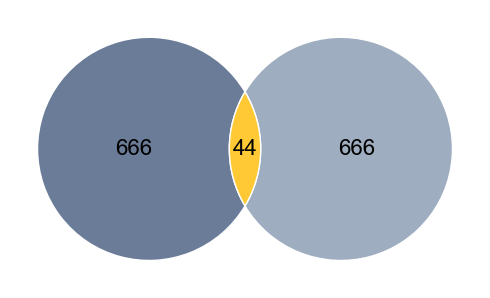

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
#cass_df = pd.read_csv('/Users/tianji/Desktop/Alu Project/Output/Merged_DSE_Results/Cass.AluOverlap.Ctrl.081325.csv')
cass_df = pd.read_csv('/Users/tianji/Desktop/Alu Project/100vs0&10vs0 Output/Cass.Merged.Results.csv')

# Replace 'gene' with the substring AFTER the last '//' (keep original if none or empty)
split_last = cass_df['gene'].str.rsplit('//', n=1)
new_gene = split_last.str[-1].str.strip()
cass_df['gene'] = new_gene.where(new_gene.ne('') & new_gene.notna(), cass_df['gene'])

dse_high_conf_cass = cass_df[cass_df['sensitivity'] == 'high']
deg_high_conf_cass = cass_df[(cass_df['100%_DEG_filter'] == 1) & (cass_df['10%_DEG_filter'] == 1)]

# Build the two sets from your dataframes
DSE_set = set(
    dse_high_conf_cass['gene']
    .dropna().astype(str).unique()
)
DEG_set = set(
    deg_high_conf_cass['gene']
    .dropna().astype(str).unique()
)

print(f'Number of Genes contaiing DSEs: {len(DSE_set)}')
print(f'Number of DEGs: {len(DEG_set)}')

# --- Plot Venn --------------------------------------------------------------
fig, ax = plt.subplots(figsize=(5, 5))

# replace with ('','') to hide them
v = venn2(
    subsets=(DSE_set, DEG_set),
    set_labels=('', ''),  # hide set labels
    ax=ax
)

# Set circle colors
if v.get_patch_by_id('10'):
    v.get_patch_by_id('10').set_facecolor('#6B7C99')
    v.get_patch_by_id('10').set_edgecolor('white')
    v.get_patch_by_id('10').set_alpha(1.0)

if v.get_patch_by_id('01'):
    v.get_patch_by_id('01').set_facecolor('#9EADC0')
    v.get_patch_by_id('01').set_edgecolor('white')
    v.get_patch_by_id('01').set_alpha(1.0)

if v.get_patch_by_id('11'):
    v.get_patch_by_id('11').set_facecolor('#FEC934')
    v.get_patch_by_id('11').set_edgecolor('white')
    v.get_patch_by_id('11').set_alpha(1.0)

# Adjust font for the numbers
for lbl in ['10', '01', '11']:
    if v.get_label_by_id(lbl):
        v.get_label_by_id(lbl).set_fontsize(16)
        v.get_label_by_id(lbl).set_family('Arial')

plt.tight_layout()

# Save to PDF
plt.savefig(
    "/Users/tianji/Desktop/Alu Project/Paper/Plots/Fig.S2A Venn Diagram DEG and DSE.pdf",
    format="pdf",
    bbox_inches="tight",
    dpi=300
)
plt.show()
plt.close()



In [99]:
intersection_genes = DSE_set.intersection(DEG_set)
print(intersection_genes)
pd.Series(sorted(intersection_genes), name="gene").to_csv("/Users/tianji/Desktop/Alu Project/Paper/Plots/Fig.S2A Intersected Genes.csv", index=False)

{'ZNF554', 'C6orf48', 'STIL', 'PLEKHA4', 'CCBL1', 'GSN', 'HIRIP3', 'EXO1', 'AURKA', 'RAD51', 'ETV1', 'LOC100499177', 'RBM3', 'PLSCR1', 'KIF15', 'C22orf25', 'GALK2', 'MIS18BP1', 'FGD6', 'DHFR', 'GMIP', 'YPEL5', 'NADSYN1', 'LOC654433', 'TMEM180', 'NRM', 'MKI67', 'DLGAP5', 'GABARAPL1', 'VWDE', 'YIPF1', 'IMPA1', 'DNMT1', 'C4orf21', 'BTN2A1', 'CD59', 'ESPL1', 'KIAA1609', 'ZNFX1-AS1', 'DONSON', 'FAM86DP', 'PARPBP', 'FANCA', 'DDX39A'}


# Supplementary Figure S4 (DEG)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
#cass_df = pd.read_csv('/Users/tianji/Desktop/Alu Project/Output/Merged_DSE_Results/Cass.AluOverlap.Ctrl.081325.csv')
#cass_df = pd.read_csv('/Users/tianji/Desktop/Alu Project/100vs0&10vs0 Output/Cass.Merged.Results.csv')
cass_df = pd.read_csv("/Users/tianji/Desktop/Alu Project/Output/Merged_DSE_Results/Cass.AluOverlap.Ctrl.110325.csv")


high_conf_cass = cass_df[cass_df['sensitivity'] == 'high']
Ku_DSE_set = set(high_conf_cass['name'])
hnRNPC_DSE_set = set(cass_df[cass_df['filter(hnRNPC_high_conf)'].isin([-1, 1])]['name'])
DHX9_DSE_set = set(cass_df[cass_df['filter(DHX9_high_conf)'].isin([-1,1])]['name'])
PTBP1_DSE_set = set(cass_df[cass_df['filter(PTBP1_union)'].isin([-1,1])]['name'])
RBFOX2_DSE_set = set(cass_df[cass_df['filter(RBFOX2_union)'].isin([-1,1])]['name'])

def plot_venn_diagram(set1, set2, output_file_name):
    # --- Plot Venn --------------------------------------------------------------
    fig, ax = plt.subplots(figsize=(5, 5))

    # replace with ('','') to hide them
    v = venn2(
        subsets=(set1, set2),
        set_labels=('', ''),  # hide set labels
        ax=ax
    )

    # Set circle colors
    if v.get_patch_by_id('10'):
        v.get_patch_by_id('10').set_facecolor('#6B7C99')
        v.get_patch_by_id('10').set_edgecolor('white')
        v.get_patch_by_id('10').set_alpha(1.0)

    if v.get_patch_by_id('01'):
        v.get_patch_by_id('01').set_facecolor('#9EADC0')
        v.get_patch_by_id('01').set_edgecolor('white')
        v.get_patch_by_id('01').set_alpha(1.0)

    if v.get_patch_by_id('11'):
        v.get_patch_by_id('11').set_facecolor('#FEC934')
        v.get_patch_by_id('11').set_edgecolor('white')
        v.get_patch_by_id('11').set_alpha(1.0)

    # Adjust font for the numbers
    for lbl in ['10', '01', '11']:
        if v.get_label_by_id(lbl):
            v.get_label_by_id(lbl).set_fontsize(16)
            v.get_label_by_id(lbl).set_family('Arial')

    plt.tight_layout()

    # Save to PDF
    plt.savefig(
        f"/Users/tianji/Desktop/Alu Project/Paper/Plots/{output_file_name}.pdf",
        format="pdf",
        bbox_inches="tight",
        dpi=300
    )
    plt.show()
    plt.close()

/var/folders/gp/l_62hzx91kz0hng_60kps5t00000gn/T/ipykernel_9277/1580627115.py:6: DtypeWarning: Columns (233) have mixed types. Specify dtype option on import or set low_memory=False.
  cass_df = pd.read_csv("/Users/tianji/Desktop/Alu Project/Output/Merged_DSE_Results/Cass.AluOverlap.Ctrl.110325.csv")


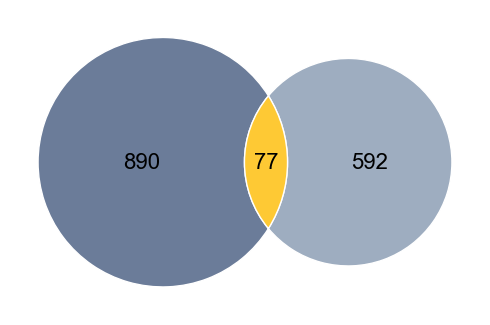

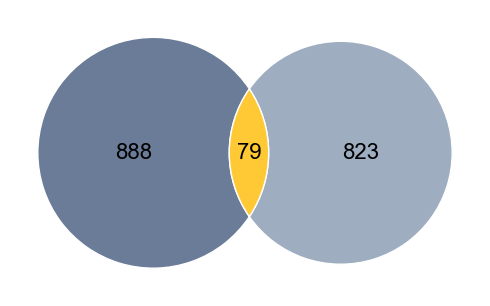

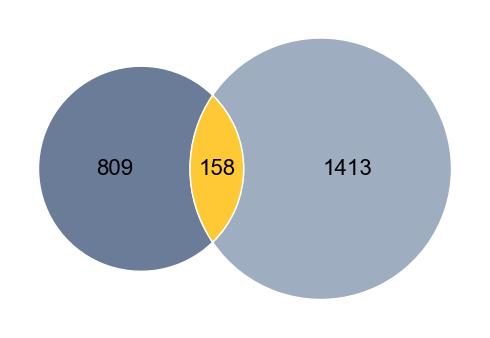

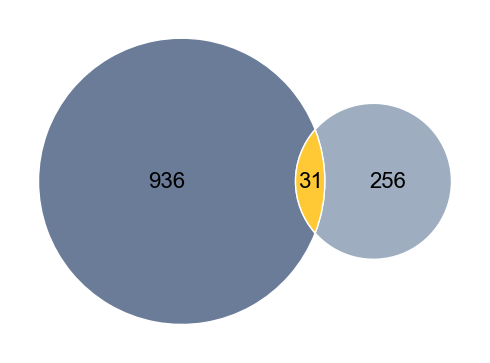

In [8]:
plot_venn_diagram(Ku_DSE_set, hnRNPC_DSE_set, 'FigS4 Ku intersects hnRNPC DSEs')
plot_venn_diagram(Ku_DSE_set, DHX9_DSE_set, 'FigS4 Ku intersects DHX9 DSEs')
plot_venn_diagram(Ku_DSE_set, PTBP1_DSE_set, 'FigS4 Ku intersects PTBP1 DSEs')
plot_venn_diagram(Ku_DSE_set, RBFOX2_DSE_set, 'FigS4 Ku intersects RBFOX2 DSEs')

# Supplementary MAV-KO and LIG4-KD

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
#cass_df = pd.read_csv('/Users/tianji/Desktop/Alu Project/Output/Merged_DSE_Results/Cass.AluOverlap.Ctrl.081325.csv')
#cass_df = pd.read_csv('/Users/tianji/Desktop/Alu Project/100vs0&10vs0 Output/Cass.Merged.Results.csv')
cass_df = pd.read_csv("/Users/tianji/Desktop/Alu Project/Output/Merged_DSE_Results/Cass.AluOverlap.Ctrl.110325.csv")

high_conf_cass = cass_df[cass_df['sensitivity'] == 'high']
Ku_DSE_set = set(high_conf_cass['name'])
Lig4_DSE_set = set(cass_df[cass_df['filter(Lig4)'].isin([-1, 1])]['name'])
MAVSKO_DSE_set = set(cass_df[cass_df['filter(MAVSKO)'].isin([-1,1])]['name'])

def plot_venn_diagram(set1, set2, output_file_name):
    # --- Plot Venn --------------------------------------------------------------
    fig, ax = plt.subplots(figsize=(5, 5))

    # replace with ('','') to hide them
    v = venn2(
        subsets=(set1, set2),
        set_labels=('', ''),  # hide set labels
        ax=ax
    )

    # Set circle colors
    if v.get_patch_by_id('10'):
        v.get_patch_by_id('10').set_facecolor('#6B7C99')
        v.get_patch_by_id('10').set_edgecolor('white')
        v.get_patch_by_id('10').set_alpha(1.0)

    if v.get_patch_by_id('01'):
        v.get_patch_by_id('01').set_facecolor('#9EADC0')
        v.get_patch_by_id('01').set_edgecolor('white')
        v.get_patch_by_id('01').set_alpha(1.0)

    if v.get_patch_by_id('11'):
        v.get_patch_by_id('11').set_facecolor('#FEC934')
        v.get_patch_by_id('11').set_edgecolor('white')
        v.get_patch_by_id('11').set_alpha(1.0)

    # Adjust font for the numbers
    for lbl in ['10', '01', '11']:
        if v.get_label_by_id(lbl):
            v.get_label_by_id(lbl).set_fontsize(16)
            v.get_label_by_id(lbl).set_family('Arial')

    plt.tight_layout()

    # Save to PDF
    #plt.savefig(
    #    f"/Users/tianji/Desktop/Alu Project/Paper/Plots/{output_file_name}.pdf",
    #    format="pdf",
    #    bbox_inches="tight",
    #    dpi=300
    #)
    plt.show()
    plt.close()

/var/folders/gp/l_62hzx91kz0hng_60kps5t00000gn/T/ipykernel_9277/4080989442.py:6: DtypeWarning: Columns (233) have mixed types. Specify dtype option on import or set low_memory=False.
  cass_df = pd.read_csv("/Users/tianji/Desktop/Alu Project/Output/Merged_DSE_Results/Cass.AluOverlap.Ctrl.110325.csv")


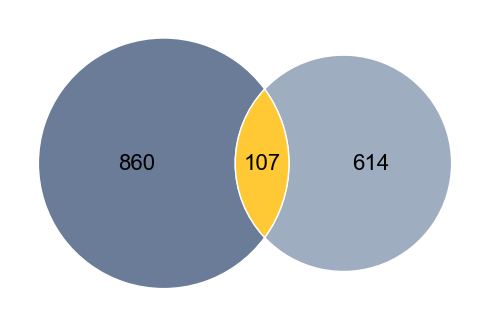

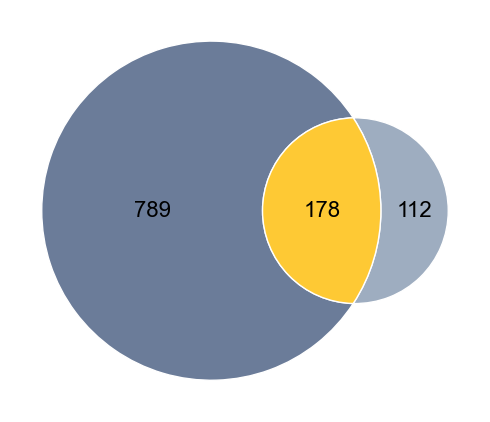

In [9]:
plot_venn_diagram(Ku_DSE_set, Lig4_DSE_set, 'FigS4 Ku intersects Lig4 DSEs')
plot_venn_diagram(Ku_DSE_set, MAVSKO_DSE_set, 'FigS4 Ku intersects MAVSKO DSEs')

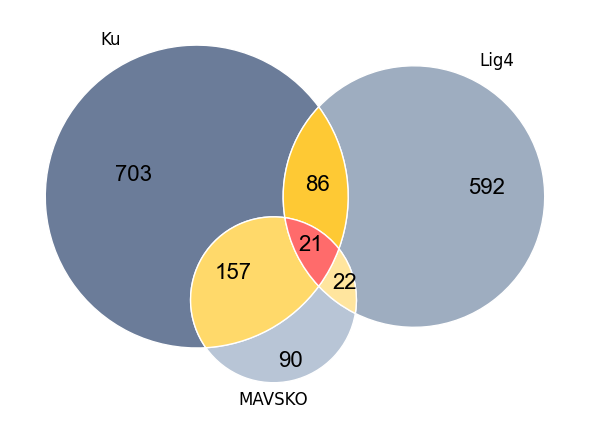

In [12]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

high_conf_cass = cass_df[cass_df['sensitivity'] == 'high']
Ku_DSE_set = set(high_conf_cass['name'])
Lig4_DSE_set = set(cass_df[cass_df['filter(Lig4)'].isin([-1, 1])]['name'])
MAVSKO_DSE_set = set(cass_df[cass_df['filter(MAVSKO)'].isin([-1,1])]['name'])

def plot_venn_diagram_3way(set1, set2, set3, output_file_name, labels=('Set1', 'Set2', 'Set3')):
    # --- Plot Venn --------------------------------------------------------------
    fig, ax = plt.subplots(figsize=(6, 6))

    # Create 3-way Venn diagram
    v = venn3(
        subsets=(set1, set2, set3),
        set_labels=labels,  # or ('', '', '') to hide them
        ax=ax
    )

    # Define colors for each region
    # '100' = only set1, '010' = only set2, '001' = only set3
    # '110' = set1 & set2, '101' = set1 & set3, '011' = set2 & set3
    # '111' = all three
    
    color_map = {
        '100': '#6B7C99',  # Only Ku
        '010': '#9EADC0',  # Only Lig4
        '001': '#B8C5D6',  # Only MAVSKO
        '110': '#FEC934',  # Ku & Lig4
        '101': '#FFD96A',  # Ku & MAVSKO
        '011': '#FFE59E',  # Lig4 & MAVSKO
        '111': '#FF6B6B'   # All three (you can change this color)
    }

    # Set circle colors
    for region_id, color in color_map.items():
        if v.get_patch_by_id(region_id):
            v.get_patch_by_id(region_id).set_facecolor(color)
            v.get_patch_by_id(region_id).set_edgecolor('white')
            v.get_patch_by_id(region_id).set_alpha(1.0)

    # Adjust font for the numbers
    for region_id in ['100', '010', '001', '110', '101', '011', '111']:
        if v.get_label_by_id(region_id):
            v.get_label_by_id(region_id).set_fontsize(16)
            v.get_label_by_id(region_id).set_family('Arial')

    plt.tight_layout()
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    plt.show()

# Call the function
plot_venn_diagram_3way(
    Ku_DSE_set, 
    Lig4_DSE_set, 
    MAVSKO_DSE_set, 
    'venn_3way.pdf',
    labels=('Ku', 'Lig4', 'MAVSKO')
)

# GO analysis

In [1]:
import pandas as pd
import numpy as np
from typing import List, Hashable
#cass_df = pd.read_csv('/Users/tianji/Desktop/Alu Project/Output/Merged_DSE_Results/Cass.AluOverlap.Ctrl.081325.csv')
cass_df = pd.read_csv('/Users/tianji/Desktop/Alu Project/100vs0&10vs0 Output/Cass.Merged.Results.csv')
high_conf_cass = cass_df[cass_df['sensitivity'] == 'high']
high_conf_cass_with_alu = high_conf_cass[high_conf_cass['alu_type'].isin(['irAlu','asAlu'])]

print(high_conf_cass['alu_type'].value_counts())

# Extract gene names after '//'
gene_names_high_conf = high_conf_cass['gene'].str.split('//').str[-1]
gene_names_high_conf = gene_names_high_conf.drop_duplicates()
gene_names_high_conf_with_alu = high_conf_cass_with_alu['gene'].str.split('//').str[-1]
gene_names_high_conf_with_alu = gene_names_high_conf_with_alu.drop_duplicates()
# Save to file, one gene per line
output_path = "/Users/tianji/Desktop/Alu Project/Paper/Plots/GO Analysis/high_conf_DSE_geneNames.txt"
gene_names_high_conf.to_csv(output_path, index=False, header=False)
output_path = "/Users/tianji/Desktop/Alu Project/Paper/Plots/GO Analysis/high_conf_DSE_with_Alu_geneNames.txt"
gene_names_high_conf_with_alu.to_csv(output_path, index=False, header=False)


/Users/tianji/mambaforge/envs/myenv/lib/python3.12/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


alu_type
other    490
irAlu    312
asAlu    158
ssAlu      7
Name: count, dtype: int64


/var/folders/gp/l_62hzx91kz0hng_60kps5t00000gn/T/ipykernel_30076/2654019040.py:5: DtypeWarning: Columns (195) have mixed types. Specify dtype option on import or set low_memory=False.
  cass_df = pd.read_csv('/Users/tianji/Desktop/Alu Project/100vs0&10vs0 Output/Cass.Merged.Results.csv')
